<a href="https://colab.research.google.com/github/Selami7321/Python-ile-Makine-Ogrenmesi/blob/main/Python_ile_Makine_%C3%96%C4%9Frenmesi_Al%C4%B1%C5%9Ft%C4%B1rma_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     12.00
Date:                Tue, 06 May 2025   Prob (F-statistic):           4.06e-05
Time:                        14:50:47   Log-Likelihood:                -314.29
No. Observations:                  30   AIC:                             636.6
Df Residuals:                      26   BIC:                             642.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.552e+04   5742.768     -2.703      0.0

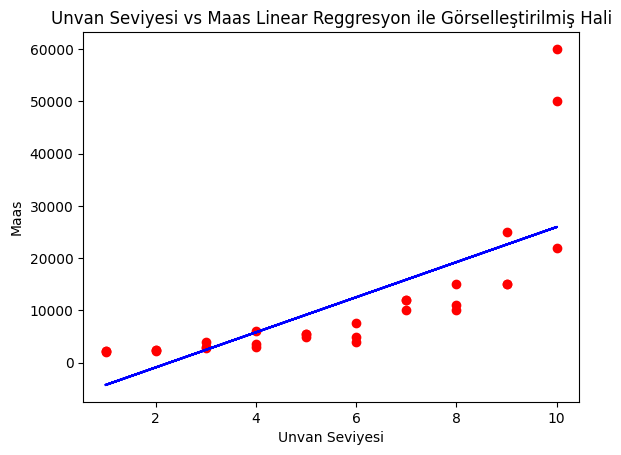

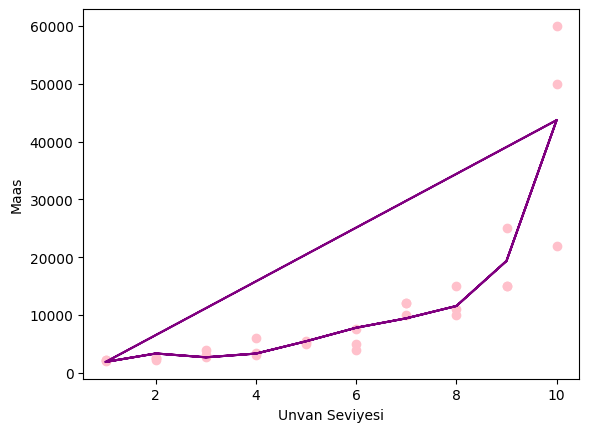

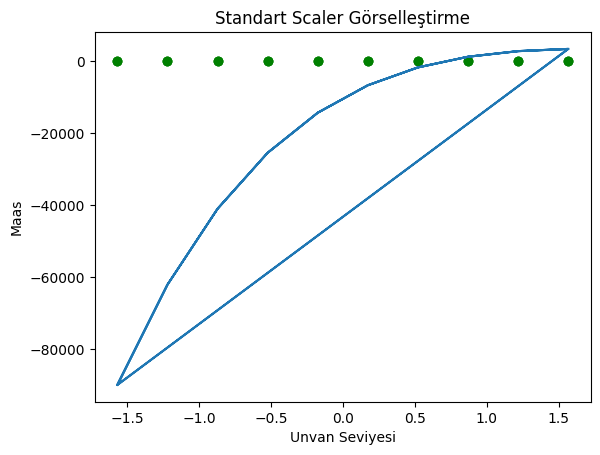

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


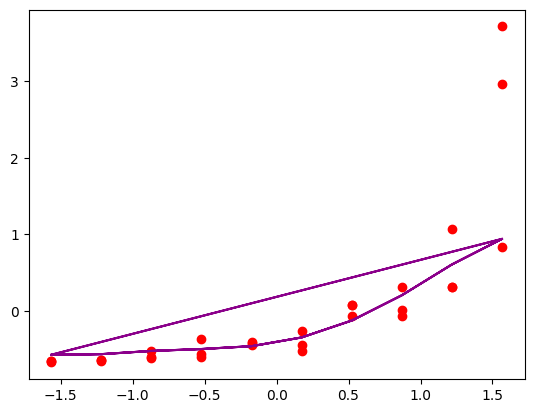

0.5848192608480245
-262882057.17700547


In [43]:
# -*- coding: utf-8 -*-
"""
Created on Tuesday May  6 18:50:13 2025

@author: Selami Çetin
"""

#1.kutuphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
# veri yukleme
df=veriler = pd.read_csv('maaslar_yeni.csv' ,sep=";")
x= veriler.iloc[: ,2:5]
y= veriler.iloc[: , 5:]

X = x.values
Y = y.values
import statsmodels.api as sm
X_with_intercept = sm.add_constant(X)  # Intercept ekle
model = sm.OLS(Y, X_with_intercept)  # OLS modelini oluştur
result = model.fit()  # Modeli eğit
print(result.summary())  # Sonuçları yazdır
from sklearn.linear_model import LinearRegression

# Özellik ve hedefi belirle
X = df[['UnvanSeviyesi']]  # Bağımsız değişken
Y = df['maas']             # Bağımlı değişken

# Modeli oluştur ve eğit
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

# Görselleştirme
plt.scatter(X, Y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.xlabel('Unvan Seviyesi')
plt.ylabel('Maas')
plt.title('Unvan Seviyesi vs Maas Linear Reggresyon ile Görselleştirilmiş Hali')
plt.show()

#-------------------------------
from sklearn.preprocessing import PolynomialFeatures

pol_reg = PolynomialFeatures(degree=5)
x_pol = pol_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_pol,Y)
plt.ylabel("Maas")
plt.xlabel("Unvan Seviyesi")
plt.scatter(X,Y,color="pink")
plt.plot(X,lin_reg2.predict(pol_reg.fit_transform(X)),color="purple")
plt.show()


#-----------------------------------
from sklearn.preprocessing import StandardScaler

sc1=StandardScaler()
x_olcekli=sc1.fit_transform(X)
y_olcekli = sc1.fit_transform(Y.to_frame())
plt.title("Standart Scaler Görselleştirme")
plt.xlabel("Unvan Seviyesi")
plt.ylabel("Maas")
plt.plot(x_olcekli,lin_reg2.predict(pol_reg.fit_transform(x_olcekli)))
plt.scatter(x_olcekli,y_olcekli, color="green")
plt.show()

#--------------------------------------

from sklearn.svm import SVR

svr_reg=SVR(kernel="rbf")
svr_reg.fit(x_olcekli,y_olcekli)
plt.scatter(x_olcekli,y_olcekli,color="red")
plt.plot(x_olcekli,svr_reg.predict(x_olcekli),color="darkmagenta")
plt.show()


print(r2_score(y_olcekli,svr_reg.predict(x_olcekli)))

# Polynomial Features:
y_pred = lin_reg2.predict(x_pol)   # x_pol: polynomial özelliklere dönüştürülmüş X
print(r2_score(y_olcekli, y_pred))
